In [1]:
from susy_qm import create_vqd_plots
import os
import json

In [12]:
folder_path = r"C:\Users\johnkerf\Desktop\Quantum-Computing\Quantum-Computing\SUSY\SUSY QM\PennyLane\VQD\Destructive SWAP\RY-CNOT-2000-30"
potentials = [f for f in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, f))]
cutoffs = [16]

In [14]:
all_data = []

for potential in potentials:
    for cutoff in cutoffs:

        data_path = folder_path + "\\{}\\{}_{}.json".format(potential,potential, cutoff)
                
        with open(data_path, 'r') as file:
            d = json.load(file)

        all_data.append(d)
        #save_path = os.path.join(folder_path, potential)
        #create_vqd_plots(data, save_path)


In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
[all(x) for x in data['success']]

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True]

In [33]:
len(transposed_energies[2])

95

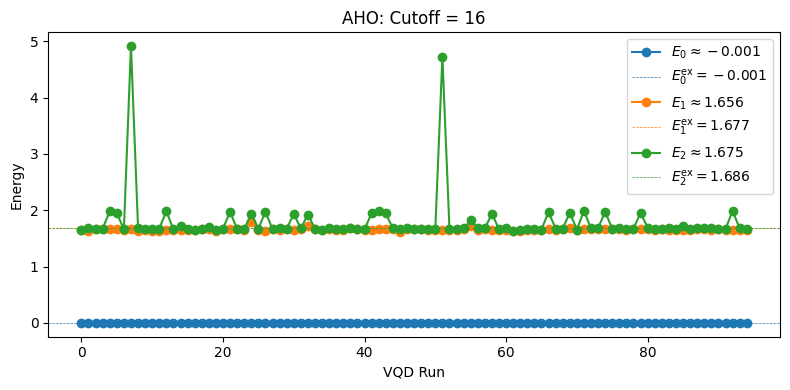

In [36]:
converged_only = True
data = all_data [0]
num_VQD = data['num_VQD']

converged = [all(x) for x in data['success']]
converged_indices = [i for i, success in enumerate(converged) if success]

if converged_only:
    results = [data['results'][i] for i in converged_indices]
else:
    results = data['results']

results = np.sort(results)

transposed_energies = list(zip(*results))
medians = [np.median(energies) for energies in transposed_energies]


plt.figure(figsize=(8, 4))

for i, energies in enumerate(transposed_energies):
    line, = plt.plot(range(len(transposed_energies[0])), energies, marker='o', linestyle='-', label=f"$E_{{{i}}} \\approx {medians[i]:.3f}$")
    plt.axhline(data['exact_eigenvalues'][i], color = line.get_color(), linestyle='--', linewidth=0.5, label=f"$E_{{{i}}}^{{\\text{{ex}}}} = {data['exact_eigenvalues'][i]:.3f}$")

plt.xlabel("VQD Run")
plt.ylabel("Energy")
plt.title(f"{data['potential']}: Cutoff = {data['cutoff']}")
#plt.xticks(range(1, num_VQD + 1))
plt.legend()
plt.tight_layout()
plt.show()

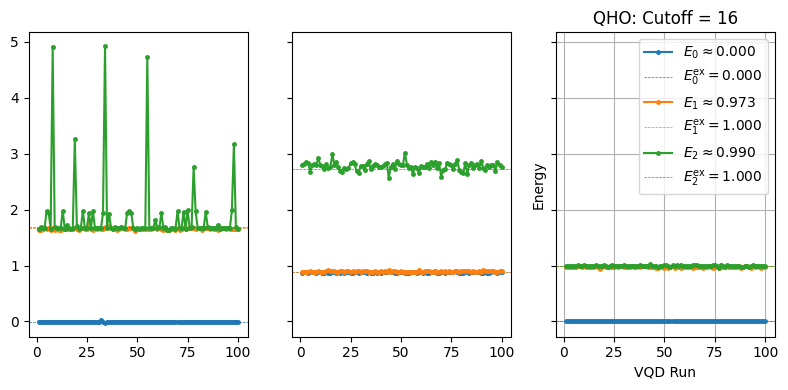

In [15]:
sort=True

fig, axes = plt.subplots(1, 3, figsize=(8, 4), sharey=True)

for i, potential in enumerate(potentials):

    data = all_data[i]
    axs = axes[i]

    num_VQD = data['num_VQD']
    converged_energies = np.sort(data['results']) if sort else data['results']

    transposed_energies = list(zip(*converged_energies))
    medians = [np.median(energies) for energies in transposed_energies]

    # Plotting
    #plt.figure(figsize=(8, 5))
    

    for i, energies in enumerate(transposed_energies):
        line, = axs.plot(range(1, num_VQD + 1), energies, marker='o', markersize=2.5, linestyle='-', label=f"$E_{{{i}}} \\approx {medians[i]:.3f}$")
        axs.axhline(data['exact_eigenvalues'][i], color = line.get_color(), linestyle='--', linewidth=0.5, label=f"$E_{{{i}}}^{{\\text{{ex}}}} = {data['exact_eigenvalues'][i]:.3f}$")

plt.xlabel("VQD Run")
plt.ylabel("Energy")
plt.title(f"{data['potential']}: Cutoff = {data['cutoff']}")
#plt.xticks(range(1, num_VQD + 1))
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()